In [1]:
from shot_detector import Shot_Detector
from utils import video_paths
import time
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
videos = video_paths('../data')

In [3]:
y_true = []
for vid in videos:
    if vid.split('/')[-2] == 'make':
        y_true.append(1)
    else:
        y_true.append(0)

In [4]:
def test_accuracy(step):
    y_pred = []

    start_time = time.time()
    for i in range(len(videos)):
        makes, _ = Shot_Detector(videos[i], step = step).run()
        y_pred.append(makes)
        end_time = time.time()
        execution_time = end_time - start_time
    
    accuracy = accuracy_score(y_true, y_pred)
    
    return accuracy, execution_time

In [5]:
accuracy, execution_time = test_accuracy(30)


0: 384x640 1 ball, 1 hoop, 67.1ms
Speed: 2.0ms preprocess, 67.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 69.9ms
Speed: 2.0ms preprocess, 69.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 hoop, 65.0ms
Speed: 1.7ms preprocess, 65.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 58.6ms
Speed: 1.8ms preprocess, 58.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 54.2ms
Speed: 1.4ms preprocess, 54.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 55.7ms
Speed: 1.3ms preprocess, 55.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 52.1ms
Speed: 1.4ms preprocess, 52.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 2 hoops, 53.5ms
Speed: 1.5ms preprocess, 53.5ms inference, 0.3ms

In [5]:
accuracy_2, execution_time_2 = test_accuracy(2)


0: 384x640 1 ball, 1 hoop, 57.1ms
Speed: 1.5ms preprocess, 57.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 54.8ms
Speed: 1.4ms preprocess, 54.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 55.2ms
Speed: 1.3ms preprocess, 55.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 2 hoops, 54.9ms
Speed: 1.3ms preprocess, 54.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 2 hoops, 67.2ms
Speed: 1.6ms preprocess, 67.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 2 hoops, 69.4ms
Speed: 1.6ms preprocess, 69.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 66.8ms
Speed: 1.5ms preprocess, 66.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 60.1ms
Speed: 1.3ms preprocess, 60.1ms infere

In [6]:
print(accuracy_2, execution_time_2)

0.6865671641791045 115.55379796028137


In [9]:
accuracy_3, execution_time_3 = test_accuracy(6)


0: 384x640 1 ball, 1 hoop, 58.9ms
Speed: 2.4ms preprocess, 58.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 2 hoops, 60.2ms
Speed: 2.6ms preprocess, 60.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 61.2ms
Speed: 1.9ms preprocess, 61.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 56.7ms
Speed: 2.2ms preprocess, 56.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 59.0ms
Speed: 1.7ms preprocess, 59.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 hoop, 57.8ms
Speed: 1.4ms preprocess, 57.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 4 hoops, 58.3ms
Speed: 1.6ms preprocess, 58.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 4 hoops, 59.1ms
Speed: 2.9ms preprocess, 59.1ms infere

In [10]:
print(accuracy_3, execution_time_3)

0.5970149253731343 52.518505811691284


In [8]:
fps = [30, 15, 5]
accuracy = [accuracy, accuracy_2, accuracy_3]
execution_time = [execution_time, execution_time_2, execution_time_3]

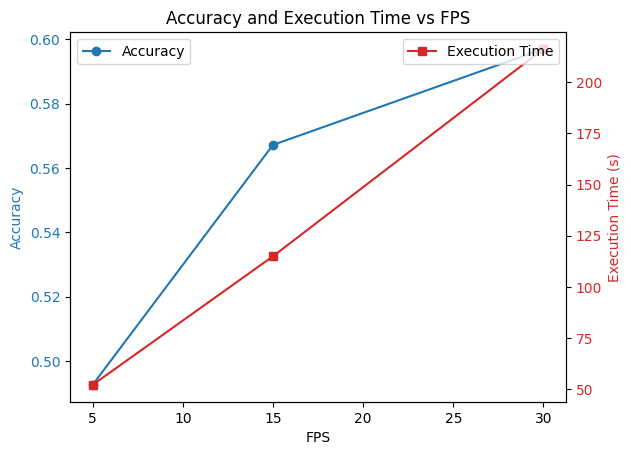

In [9]:
fig, ax1 = plt.subplots()

# plot accuracy
ax1.set_xlabel('FPS')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(fps, accuracy, color='tab:blue', marker='o', label='Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# plot execution time
ax2 = ax1.twinx()
ax2.set_ylabel('Execution Time (s)', color='tab:red')
ax2.plot(fps, execution_time, color='tab:red', marker='s', label='Execution Time')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding title and legends
plt.title('Accuracy and Execution Time vs FPS')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.savefig("plotNew")
plt.show()

# Conclusion

Interestingly, at 15 FPS detection, increases by 4% while execution time is nearly 100 seconds faster. This displays how accurate the algorithm can be, even when given less information to use.

Looking at the outputs of the missclassified videos, there are commmon themes:
- Ball did not fully go through the net, so the algorithm did not detect a full shot
- Moving camera, not allowing the algorithm to track the ball/hoop well
- Camera angle that makes it seem like the ball went in as the ball falls closer/further than the rim but is still in between the ends of the rim

The position of the camera is crucial for the algorithm to have accurate classifications. Based on these results, the camera should be placed at an angle with the hoop to minimize situations where the ball is on target, but goes past/stops short of the rim.

